0   2023-02-01
1   2023-02-02
2   2023-02-03
3   2023-02-04
4   2023-02-05
Name: date, dtype: datetime64[ns]


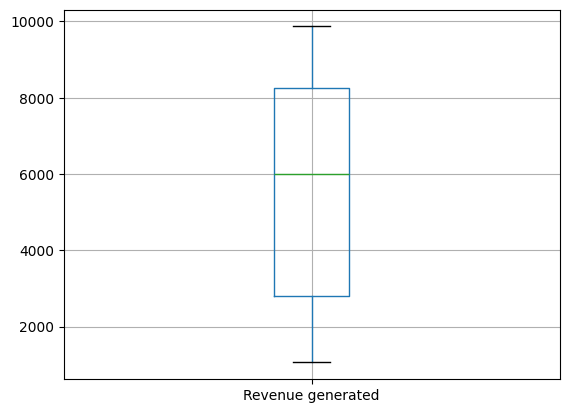

           Product type   SKU      Price  Availability  \
date                                                     
2023-02-01     haircare  SKU0  69.808006            55   
2023-02-02     skincare  SKU1  14.843523            95   
2023-02-03     haircare  SKU2  11.319683            34   
2023-02-04     skincare  SKU3  61.163343            68   
2023-02-05     skincare  SKU4   4.805496            26   

            Number of products sold  Revenue generated Customer demographics  \
date                                                                           
2023-02-01                      802        8661.996792            Non-binary   
2023-02-02                      736        7460.900065                Female   
2023-02-03                        8        9577.749626               Unknown   
2023-02-04                       83        7766.836426            Non-binary   
2023-02-05                      871        2686.505152            Non-binary   

            Stock levels  Lead t

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# Load dataset
df = pd.read_csv(r"C:\\Users\\esrab\\OneDrive\\Desktop\\job search\\supply chain\\supply_chain_data.csv")

# If the 'date' column is not already in datetime format, convert it
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Verify the 'date' column
print(df['date'].head())  # Check if the 'date' column is correctly formatted

# Set date as the index for time-series operations
df.set_index('date', inplace=True)

# Handle missing values using forward fill
df.ffill(inplace=True)  # Forward fill missing values

# Check for outliers in the 'Revenue generated' column
df.boxplot(column='Revenue generated')

# Display the plot
plt.show()

# Show first few rows to verify changes
print(df.head())



In [102]:

# Assuming df is already loaded

# If 'date' is missing or not set, add it
if 'date' not in df.columns:
    df['date'] = pd.date_range(start="2023-01-01", periods=len(df), freq='D')

# Set 'date' as the index if it is not already
df.set_index('date', inplace=True)

# Log Transformation on 'Number of products sold'
df['log_number_of_products_sold'] = np.log1p(df['Number of products sold'])

# Create rolling mean for 'Number of products sold' (7-day window)
df['products_sold_rolling_mean'] = df['Number of products sold'].rolling(window=7).mean()

# Lag feature (previous day's 'Number of products sold')
df['lag_products_sold'] = df['Number of products sold'].shift(1)

# Percent change for 'Number of products sold' (percentage change from previous day)
df['products_sold_percent_change'] = df['Number of products sold'].pct_change()

# Extract date-related features (if 'date' column is present)
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

# One-Hot Encoding for categorical features like 'Product type', 'Supplier name', 'Location'
df = pd.get_dummies(df, columns=['Product type', 'Supplier name', 'Location'])

# Forward fill missing values
df.ffill(inplace=True)

# Show the transformed data
print(df.head())



             SKU      Price  Availability  Number of products sold  \
date                                                                 
2023-01-01  SKU0  69.808006            55                      802   
2023-01-02  SKU1  14.843523            95                      736   
2023-01-03  SKU2  11.319683            34                        8   
2023-01-04  SKU3  61.163343            68                       83   
2023-01-05  SKU4   4.805496            26                      871   

            Revenue generated Customer demographics  Stock levels  Lead times  \
date                                                                            
2023-01-01        8661.996792            Non-binary            58           7   
2023-01-02        7460.900065                Female            53          30   
2023-01-03        9577.749626               Unknown             1          10   
2023-01-04        7766.836426            Non-binary            23          13   
2023-01-05        2686.

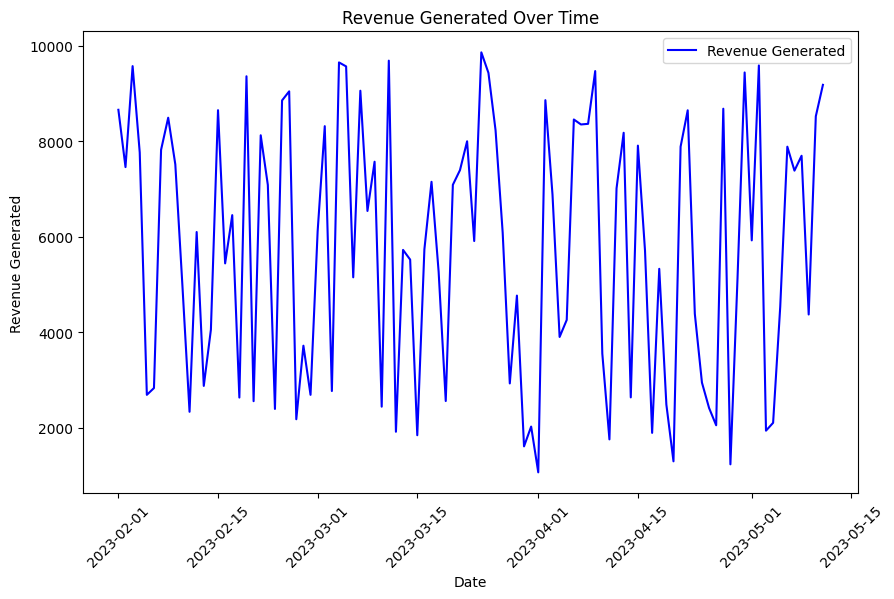

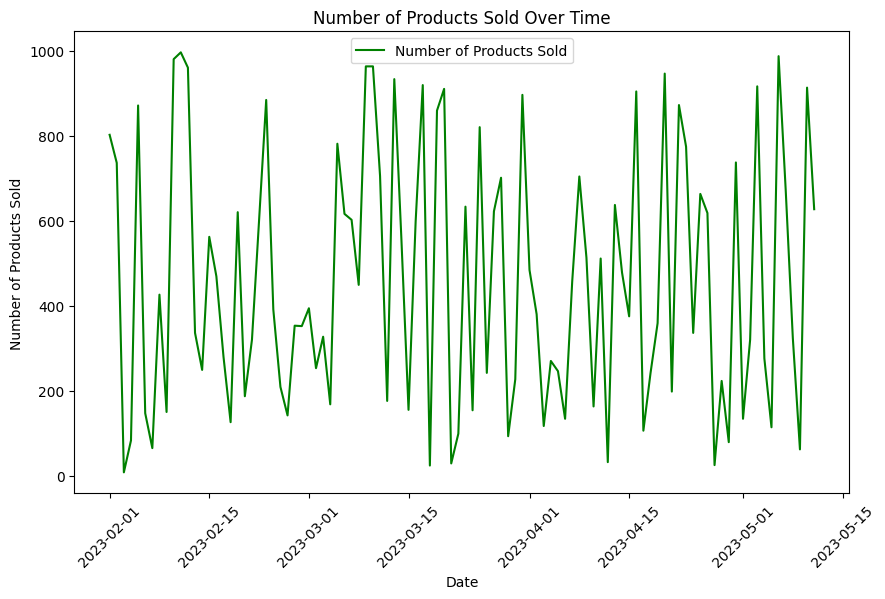

In [122]:
# Plot 'Revenue generated' over time
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Revenue generated'], label='Revenue Generated', color='blue')
plt.title('Revenue Generated Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot 'Number of products sold' over time
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Number of products sold'], label='Number of Products Sold', color='green')
plt.title('Number of Products Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.xticks(rotation=45)
plt.legend()
plt.show()



In [104]:
#Step 2: Model Building (Time Series Forecasting)
#Split the Data: Divide your dataset into a training and test set to evaluate the performance of the forecasting model.
#Use the first 80% of the data for training and the remaining 20% for testing.


In [105]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


In [106]:
#Choose a Time Series Model:
#ARIMA (AutoRegressive Integrated Moving Average) or SARIMA (Seasonal ARIMA) for time series forecasting.
#Prophet by Facebook for handling seasonality and holidays.

C:\Users\esrab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\esrab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\esrab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


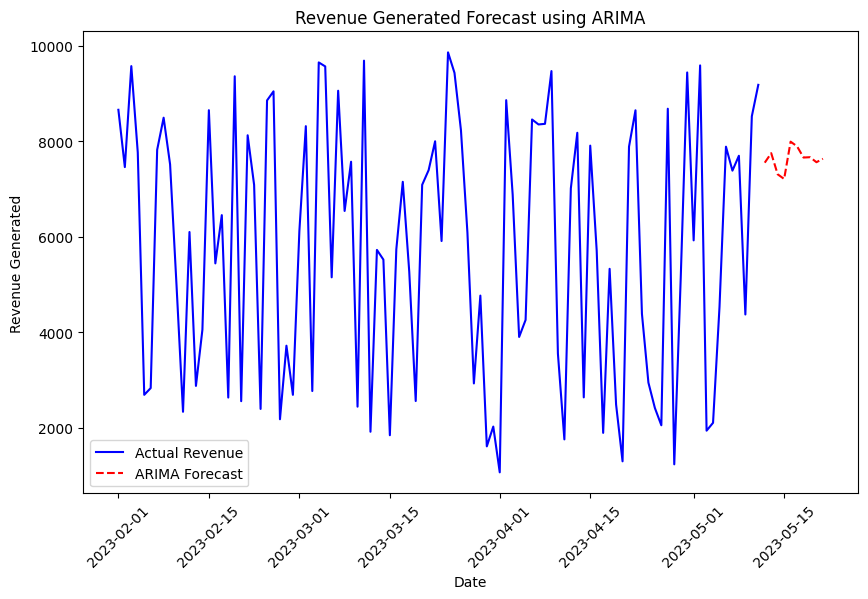

In [124]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model on 'Revenue generated' data
model = ARIMA(df['Revenue generated'], order=(5,1,0))  # p=5, d=1, q=0 (you can tune these parameters)
model_fit = model.fit()

# Forecast the next 10 periods (days)
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Revenue generated'], label='Actual Revenue', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=11, freq='D')[1:], forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('Revenue Generated Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45)
plt.legend()
plt.show()



In [108]:
#3. Fit the ARIMA Model
#ARIMA requires specifying three parameters: (p, d, q):

#p = the number of lag observations in the model (AR term).
#d = the number of times the data is differenced to make it stationary (I term).
#q = the size of the moving average window (MA term).

In [125]:
# Fit an ARIMA model (example: p=1, d=1, q=1)
model = ARIMA(train['Number of products sold'], order=(1, 1, 1))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Number of products sold   No. Observations:                   80
Model:                      ARIMA(1, 1, 1)   Log Likelihood                -564.597
Date:                     Sun, 16 Mar 2025   AIC                           1135.195
Time:                             13:38:22   BIC                           1142.303
Sample:                         01-01-2023   HQIC                          1138.042
                              - 03-21-2023                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0020      0.110      0.018      0.986      -0.213       0.217
ma.L1         -0.9999     28.836     -0.035      0.972     -57.518      55.518
sigma2      

C:\Users\esrab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\esrab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\esrab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [128]:
#evaluate the model:

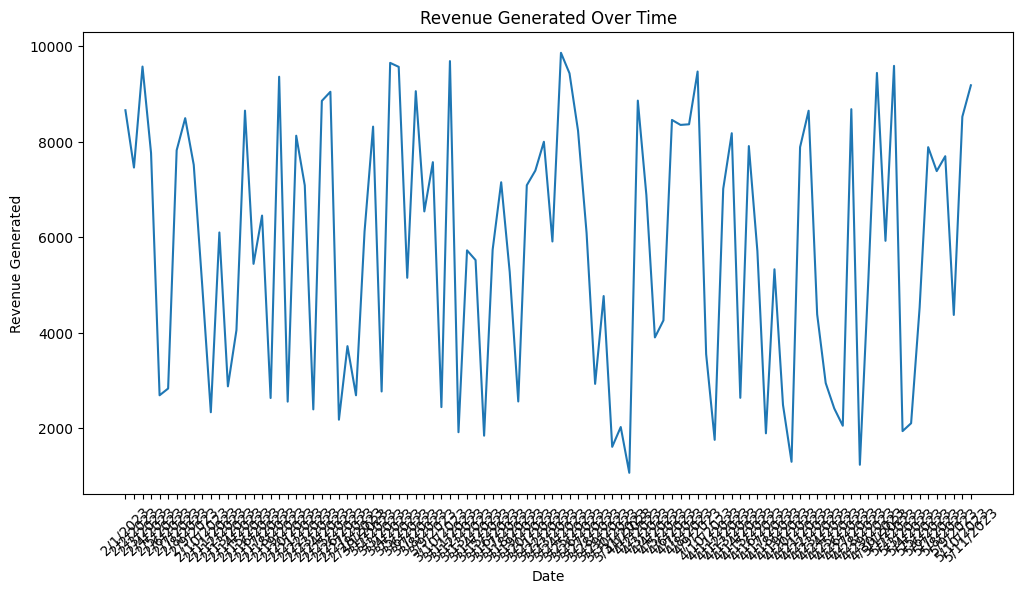

C:\Users\esrab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\esrab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\esrab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE (Mean Absolute Error): 2494.9823651357756
MSE (Mean Squared Error): 7743616.164306855
RMSE (Root Mean Squared Error): 2782.735374466436
MAPE (Mean Absolute Percentage Error): nan%


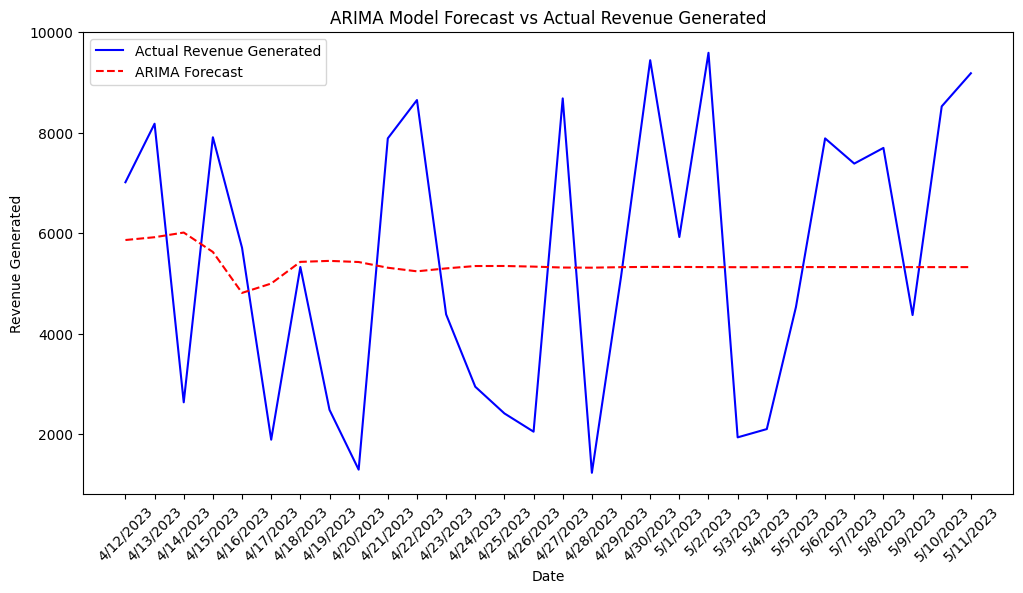

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Load dataset
df = pd.read_csv(r"C:\\Users\\esrab\\OneDrive\\Desktop\\job search\\supply chain\\supply_chain_data.csv")

# Verify if the 'date' column exists, if not, we can generate it
if 'date' not in df.columns:
    df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

# Set 'date' as the index for time-series operations
df.set_index('date', inplace=True)

# Handle missing values by forward filling (if any)
df.ffill(inplace=True)

# Visualize the 'Revenue generated' column to understand its trend
plt.figure(figsize=(12, 6))
plt.plot(df['Revenue generated'])
plt.title('Revenue Generated Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45)
plt.show()

# Split data into train and test sets (train on all data except last 30 days for testing)
train = df['Revenue generated'][:-30]
test = df['Revenue generated'][-30:]

# Fit ARIMA model on training set
model = ARIMA(train, order=(5,1,0))  # ARIMA(p,d,q)
model_fit = model.fit()

# Forecast the next 30 days (testing period)
forecast = model_fit.forecast(steps=30)

# Evaluate the model using MAE, MSE, RMSE, and MAPE
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = sqrt(mse)
mape = np.mean(np.abs((test - forecast) / test)) * 100

# Display evaluation metrics
print(f"MAE (Mean Absolute Error): {mae}")
print(f"MSE (Mean Squared Error): {mse}")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"MAPE (Mean Absolute Percentage Error): {mape}%")

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Revenue Generated', color='blue')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('ARIMA Model Forecast vs Actual Revenue Generated')
plt.xlabel('Date')
plt.ylabel('Revenue Generated')
plt.legend()
plt.xticks(rotation=45)
plt.show()
